# **ABOUT Chest_XRay dataset**:
This dataset contains 3 folders namely: 

1.   test (testing images)
2.   train (training images)
3.   val (validation images)

Each of these 3 folders contains two more folders(which are our 2 classes) namely:

1.   Normal
2.   Pneumonia





**Extracting the dataset from a zip file**

In [0]:
import zipfile
#path of the zip file
path_zipfile = '/content/drive/My Drive/Datasets/chest_xray.zip'
with zipfile.ZipFile(path_zipfile,'r') as zip_ref:
    zip_ref.extractall('')

**Exploring how a single image looks like**

In [0]:
import cv2
img = cv2.imread('/content/chest_xray/test/NORMAL/IM-0001-0001.jpeg')

**Note**: To get the gray scale image use below code (i.e., pass 0 as second parameter)

img = cv2.imread('/content/chest_xray/test/NORMAL/IM-0001-0001.jpeg',0)

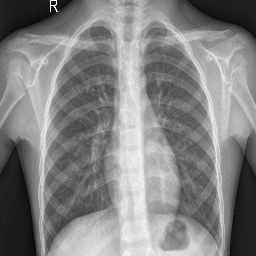

In [3]:
# this will work in local system
# cv2.imshow(img,'image')
from google.colab.patches import cv2_imshow
cv2_imshow(cv2.resize(img,(256,256)))

In [4]:
img.shape

(1317, 1857, 3)

In [5]:
#img is nothing but matrix of pixel values
img

array([[[ 0,  0,  0],
        [32, 32, 32],
        [33, 33, 33],
        ...,
        [33, 33, 33],
        [34, 34, 34],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [33, 33, 33],
        [33, 33, 33],
        ...,
        [34, 34, 34],
        [34, 34, 34],
        [ 0,  0,  0]],

       [[ 1,  1,  1],
        [33, 33, 33],
        [33, 33, 33],
        ...,
        [34, 34, 34],
        [34, 34, 34],
        [ 0,  0,  0]],

       ...,

       [[ 0,  0,  0],
        [28, 28, 28],
        [28, 28, 28],
        ...,
        [34, 34, 34],
        [35, 35, 35],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [29, 29, 29],
        [28, 28, 28],
        ...,
        [34, 34, 34],
        [35, 35, 35],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [29, 29, 29],
        [29, 29, 29],
        ...,
        [35, 35, 35],
        [34, 34, 34],
        [ 0,  0,  0]]], dtype=uint8)

**ACTUAL PROCESS** 
1. Prepare training data.
2. Prepare testing data
3. Prepare validation data


**Below is the common function which seperates the X and y values**


In [0]:
import os
def seperate_X_and_y(normal_imgs_path,pnemo_imgs_path):
  # values to return
  X_values = []  # input/Predictors
  Y_values = []  # output/response

  # Normal images
  list_nrml_image_names = os.listdir(normal_imgs_path)
  print(normal_imgs_path,len(list_nrml_image_names))
  for i in range(len(list_nrml_image_names)):
    try:
      img = cv2.imread(normal_imgs_path + '/' + list_nrml_image_names[i],0)
      img = cv2.resize(img,(256,256)) #reducing the size of the image
      X_values.append(img)
      Y_values.append(1) # setting label as 1 for normal images
    except:
      pass

  # Pheumonia images
  list_pneum_image_names = os.listdir(pnemo_imgs_path)
  print(pnemo_imgs_path,len(list_pneum_image_names))
  for i in range(len(list_pneum_image_names)):
    try:
      img = cv2.imread(pnemo_imgs_path + '/' +list_pneum_image_names[i],0)
      img = cv2.resize(img,(256,256)) #reducing the size of the image
      X_values.append(img)
      Y_values.append(0) # setting label as 0 for Pheumonia images
    except:
      pass
  return X_values,Y_values

In [7]:
X_train,y_train = seperate_X_and_y('/content/chest_xray/train/NORMAL','/content/chest_xray/train/PNEUMONIA')
X_test,y_test = seperate_X_and_y('/content/chest_xray/test/NORMAL','/content/chest_xray/test/PNEUMONIA')
X_valid,y_valid = seperate_X_and_y('/content/chest_xray/val/NORMAL','/content/chest_xray/val/PNEUMONIA')

/content/chest_xray/train/NORMAL 1342
/content/chest_xray/train/PNEUMONIA 3876
/content/chest_xray/test/NORMAL 234
/content/chest_xray/test/PNEUMONIA 390
/content/chest_xray/val/NORMAL 9
/content/chest_xray/val/PNEUMONIA 9


In [0]:
# Converting to numpy array
import numpy as np
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

X_valid = np.array(X_valid)
y_valid = np.array(y_valid)

In [0]:
# Checking the shapes
def check_shapes():
  print('shapes of X_train = {} , y_train = {} '.format(X_train.shape,y_train.shape))
  print('shapes of X_test = {}, y_test = {}'.format(X_test.shape,y_test.shape))
  print('shapes of X_valid = {}, y_valid = {}'.format(X_valid.shape,y_valid.shape))

In [10]:
check_shapes()

shapes of X_train = (5216, 256, 256) , y_train = (5216,) 
shapes of X_test = (624, 256, 256), y_test = (624,)
shapes of X_valid = (16, 256, 256), y_valid = (16,)


In [11]:
#flattening
X_train = X_train.reshape((5216,256*256)) 
X_test = X_test.reshape((624,256*256))
X_valid = X_valid.reshape((16,256*256))
check_shapes()

shapes of X_train = (5216, 65536) , y_train = (5216,) 
shapes of X_test = (624, 65536), y_test = (624,)
shapes of X_valid = (16, 65536), y_valid = (16,)


**Importing the essential libraries**

In [0]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
LRelu = tf.keras.layers.LeakyReLU(alpha=0.3)

**Building neural network**

In [0]:
#Initialize the model
model = Sequential()

#adding first layer 
#Dense is the layer used for ANN ,32 is output shape ,input_dim = no.of predictors,and activation function to be used is relu
model.add(Dense(64,input_dim = 65536))
#Batch Normalization to reduce variance and speed up the process
model.add(BatchNormalization())
#Regularization
model.add(Dropout(0.5))

#adding 6 layers
for i in range(6):
  model.add(Dense(256,activation = 'relu'))
  model.add(BatchNormalization())
  if(i%2==0):
    drp_rt = 0.6
  else:
    drp_rt = 0.7
  model.add(Dropout(drp_rt))

#output layer
model.add(Dense(1,activation='sigmoid'))

In [0]:
#compile the keras model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
# fit the keras model on the dataset
# epochs = number of iterations
history = model.fit(X_train,y_train,epochs= 10,batch_size=250,validation_data=(X_test,y_test))

Epoch 1/10
21/21 [==============================] - 1s 31ms/step - loss: 1.1270 - accuracy: 0.5213 - val_loss: 0.6686 - val_accuracy: 0.6250
Epoch 2/10
21/21 [==============================] - 0s 18ms/step - loss: 0.9372 - accuracy: 0.5663 - val_loss: 0.5934 - val_accuracy: 0.6250
Epoch 3/10
21/21 [==============================] - 0s 18ms/step - loss: 0.8591 - accuracy: 0.5821 - val_loss: 0.6081 - val_accuracy: 0.6250
Epoch 4/10
21/21 [==============================] - 0s 17ms/step - loss: 0.7452 - accuracy: 0.6254 - val_loss: 0.6185 - val_accuracy: 0.6250
Epoch 5/10
21/21 [==============================] - 0s 18ms/step - loss: 0.7139 - accuracy: 0.6321 - val_loss: 0.6368 - val_accuracy: 0.6250
Epoch 6/10
21/21 [==============================] - 0s 18ms/step - loss: 0.6653 - accuracy: 0.6518 - val_loss: 0.6644 - val_accuracy: 0.6795
Epoch 7/10
21/21 [==============================] - 0s 18ms/step - loss: 0.6270 - accuracy: 0.6699 - val_loss: 0.6666 - val_accuracy: 0.6939
Epoch 8/10
21

**Graph of accuray and val_acc**

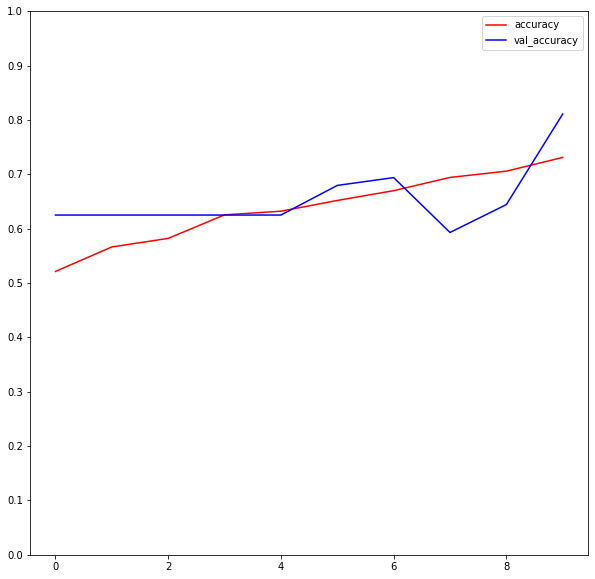

In [16]:
import matplotlib.pyplot as plt
acc_list = history.history['accuracy']
val_acc_list = history.history['val_accuracy']
epoch_list = [i for i in range(len(acc_list))] 

plt.figure(figsize = (10,10))
p1 = plt.plot(epoch_list,acc_list, c = 'r')
p2 = plt.plot(epoch_list,val_acc_list, c = 'b')
plt.legend(('accuracy','val_accuracy'))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

May be because of imbalanced dataset our validation accuracy is deflecting a little more